In [90]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

File ‘SPY.csv’ already there; not retrieving.



In [91]:
!pip install -U arch statsmodels

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [93]:
df = pd.read_csv('SPY.csv', parse_dates=True, index_col='Date')

In [94]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [95]:
df['LogRet'] = np.log(df['Close']).diff()

In [96]:
# df2 = df.loc['2010-01-05':'2015-01-01'].copy()
df2 = df.iloc[1:]

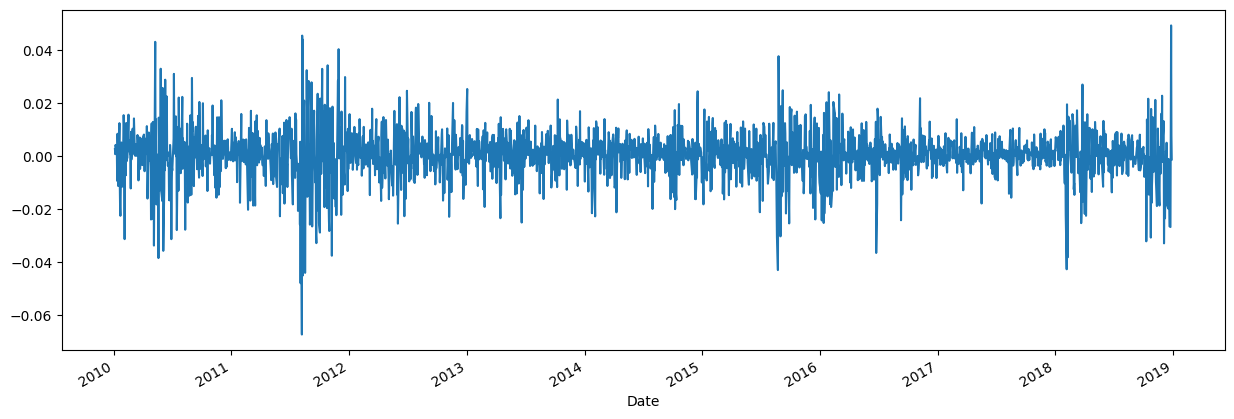

In [97]:
df2['LogRet'].plot(figsize=(15, 5));

In [98]:
df2['Ysq'] = df['LogRet'] ** 2

/tmp/ipython-input-2122057640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ysq'] = df['LogRet'] ** 2


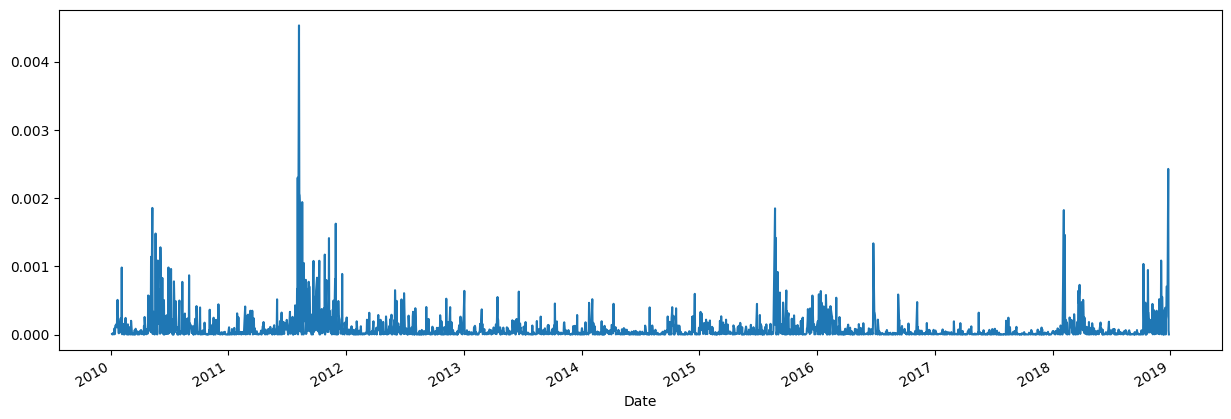

In [99]:
df2['Ysq'].plot(figsize=(15, 5));

In [100]:
# ACF and PACF
# Below we demonstrate that Log returns has NO SIGNIFICANT "AUTOCORRELATION LAGS" as shown in ACF and PACF plots
# But SQUARE OF Log returns HAS SIGNIFICANT "AUTOCORRELATION LAGS" as shown in ACF and PACF plots

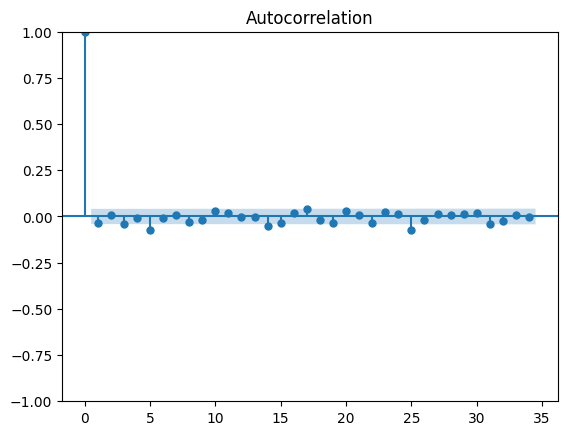

In [101]:
plot_acf(df2['LogRet']);

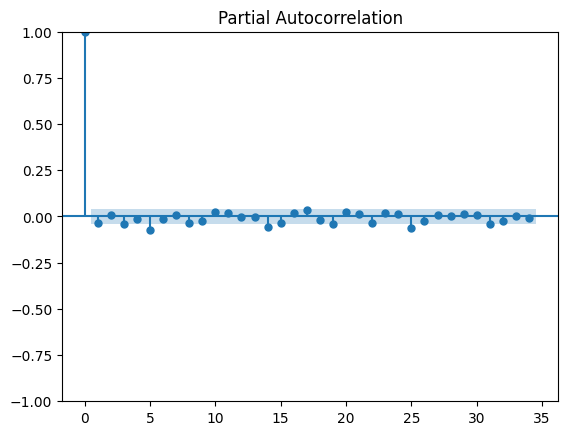

In [102]:
plot_pacf(df2['LogRet']);

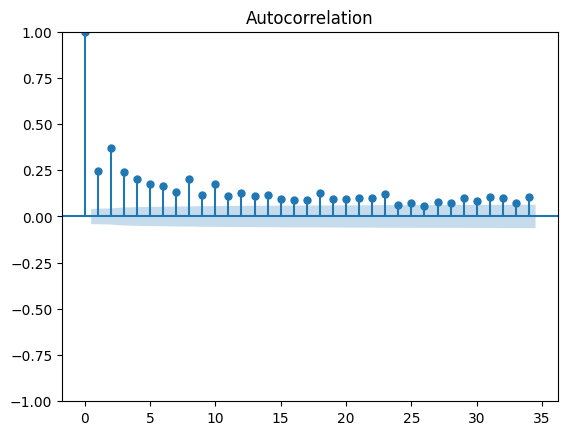

In [103]:
plot_acf(df2['Ysq']);

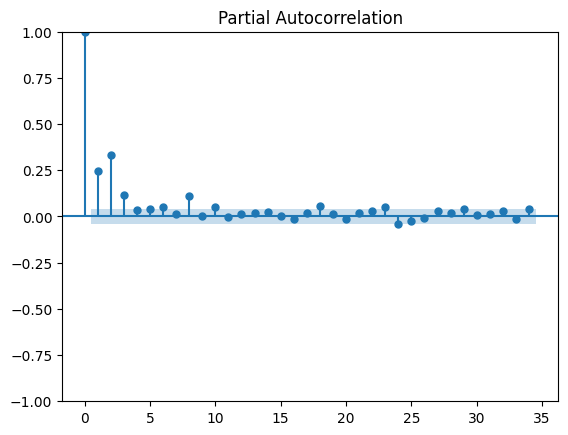

In [104]:
plot_pacf(df2['Ysq']);

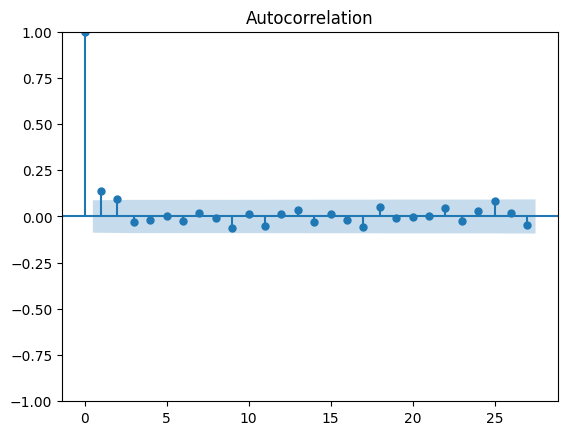

In [105]:
'''
we observe that while both STOCK RETURN and GAUSSIAN WHITE NOISE have NO SIGNIFICANT AUTOCORRELATION LAGS in ACF and PACF plots,
the SQUARE OF STOCK RETURN HAS while SQUARE OF GAUSSIAN WHITE NOISE DOESN'T HAVE SIGNIFICANT AUTOCORRELATION LAGS in ACF and PACF plots
'''

noise_sq = np.random.randn(500)**2
plot_acf(noise_sq);

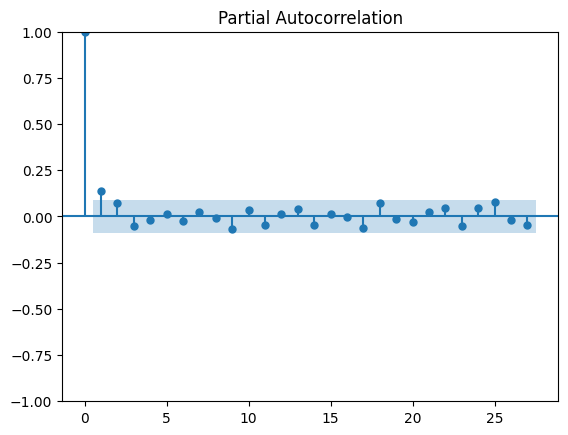

In [106]:
plot_pacf(noise_sq);

In [107]:
# Train-Test Split

In [108]:
Ntest = 500
train = df2.iloc[:-Ntest][['LogRet']].copy()
test = df2.iloc[-Ntest:][['LogRet']].copy()

In [80]:
# Why do we need scaling?

In [109]:
model = arch_model(train['LogRet'], vol='GARCH', p=1, q=1)

In [110]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2668736257957.028
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6749817.594942288
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5876.700716597362
            Iterations: 3
            Function evaluations: 27
            Gradient evaluations: 2


/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.532e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


In [111]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 LogRet   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5876.70
Distribution:                  Normal   AIC:                          -11745.4
Method:            Maximum Likelihood   BIC:                          -11723.5
                                        No. Observations:                 1762
Date:                Thu, Nov 27 2025   Df Residuals:                     1761
Time:                        12:54:53   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.1063e-04  1.947e-04      3.136  1.711e-03 [2.290e-04,9.922e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.9064e-06  6.290e-13  3.031e+06      0.000 [1.906e-06,1.906e-06]
alpha[1]       0.1000  9.632e-04    103.824      0.000   [9.811e-02,  0.102]
beta[1]        0.8800  5.523e-03    159.341      0.000     [  0.869,  0.891]
============================================================================

Covariance estimator: robust
"""

In [ ]:
# ARCH(1)

In [112]:
m = train['LogRet'].mean()
s = train['LogRet'].std()
train['Scaled'] = (train['LogRet'] - m) / s
test['Scaled'] = (test['LogRet'] - m) / s
df2['Scaled'] = (df2['LogRet'] - m) / s

/tmp/ipython-input-4063475337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Scaled'] = (df2['LogRet'] - m) / s


In [113]:
arch1 = arch_model(train['Scaled'], vol='ARCH', p=1)

In [114]:
res_arch1 = arch1.fit(update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2457.9840288311248
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


In [115]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2457.98
Distribution:                  Normal   AIC:                           4921.97
Method:            Maximum Likelihood   BIC:                           4938.39
                                        No. Observations:                 1762
Date:                Thu, Nov 27 2025   Df Residuals:                     1761
Time:                        12:55:26   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0127  2.325e-02      0.545      0.586 [-3.291e-02,5.825e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8188  6.722e-02     12.181  3.936e-34   [  0.687,  0.951]
alpha[1]       0.1771  4.774e-02      3.709  2.079e-04 [8.350e-02,  0.271]
==========================================================================

Covariance estimator: robust
"""

/tmp/ipython-input-3071396913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ARCH(1)'] = res_arch1.conditional_volatility


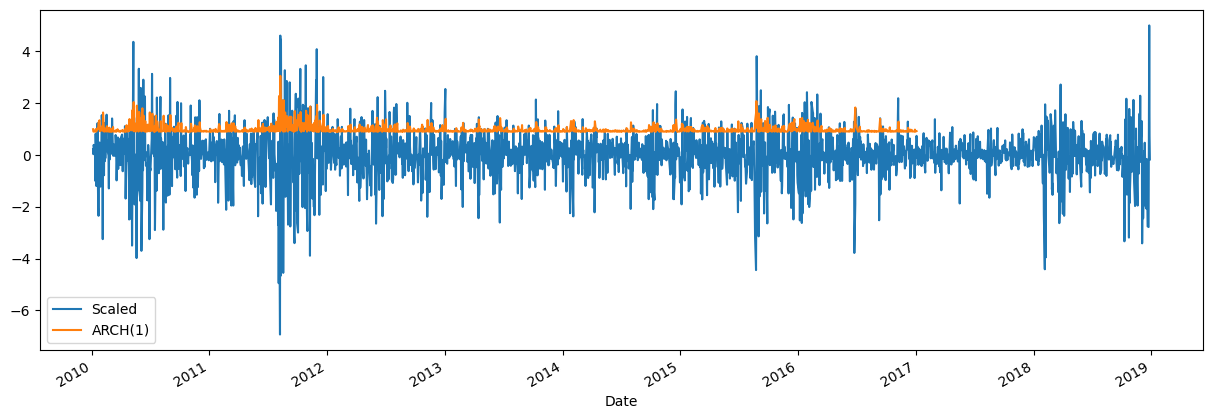

In [116]:
df2['ARCH(1)'] = res_arch1.conditional_volatility
df2[['Scaled', 'ARCH(1)']].plot(figsize=(15, 5));

In [117]:
res_arch1.forecast(horizon=Ntest)

In [118]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=True)

In [119]:
fcast_arch1

In [122]:
# In last row, mean is same for all columns because in arch model "Mean Model:	Constant Mean" as can be seen in model sumamry
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# fcast_arch1.variance and fcast_arch1.residual_variance last rows are same when we use ZERO or CONSTANT MEAN as our MEAN MODEL
fcast_arch1.residual_variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=False)

In [127]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,...,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671


In [128]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.912612,0.98042,0.992427,0.994553,0.994929,0.994996,0.995008,0.99501,0.99501,0.99501,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501


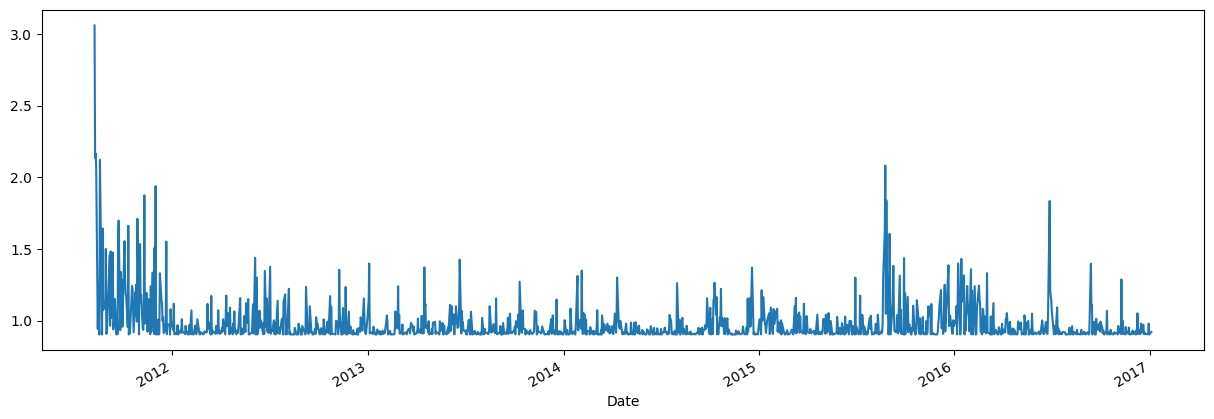

In [129]:
df2.loc['2011-08-09':]['ARCH(1)'].plot(figsize=(15, 5));

In [130]:
fcast_arch1 = res_arch1.forecast(
    horizon=Ntest, reindex=True, start='2011-08-01')

In [131]:
fcast_arch1.variance['2011-07-28':'2011-08-05']

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.861165,0.971311,0.990814,0.994267,0.994878,0.994987,0.995006,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-02,2.112095,1.192807,1.030033,1.001211,0.996108,0.995204,0.995044,0.995016,0.995011,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-03,0.863233,0.971677,0.990879,0.994279,0.994881,0.994987,0.995006,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-04,5.183712,1.736683,1.126334,1.018263,0.999127,0.995739,0.995139,0.995033,0.995014,0.995011,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-05,0.826340,0.965144,0.989722,0.994074,0.994844,0.994981,0.995005,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501


In [132]:
fcast_arch1.variance.loc['2011-08-09'].to_numpy().shape

(500,)

In [133]:
df2.index.get_loc('2011-08-09')

402

In [135]:
# since our Ntest or number of forecasted points is 500, we are trying to find date of 500th forecasted point
df2.index[402 + 500]

Timestamp('2013-08-06 00:00:00')

In [136]:
df2.loc['2011-08-10':'2013-08-06', 'ARCH(1) Forecast'] = np.sqrt(
    fcast_arch1.variance.loc['2011-08-09'].to_numpy())

/tmp/ipython-input-3281532167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['2011-08-10':'2013-08-06', 'ARCH(1) Forecast'] = np.sqrt(


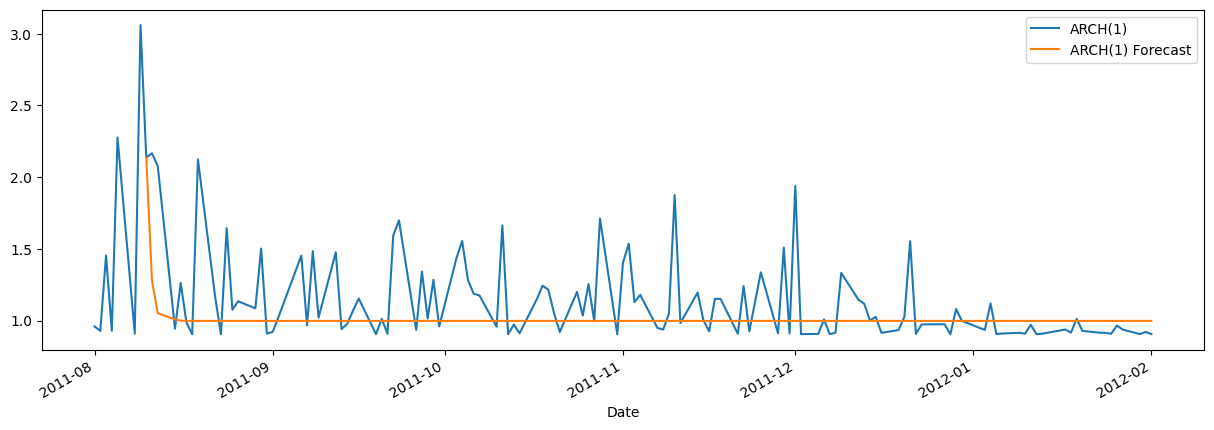

In [137]:
df2.loc['2011-08-01':'2012-02-01'][['ARCH(1)', 'ARCH(1) Forecast']].plot(
    figsize=(15, 5));

In [138]:
fcast_arch1.variance.index.get_loc('2011-08-17')

408

In [139]:
df2.index[408 + 500]

Timestamp('2013-08-14 00:00:00')

In [140]:
df2.loc['2011-08-18':'2013-08-14', 'ARCH(1) Forecast Low'] = np.sqrt(
    fcast_arch1.variance.loc['2011-08-17'].to_numpy())

/tmp/ipython-input-1441366579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['2011-08-18':'2013-08-14', 'ARCH(1) Forecast Low'] = np.sqrt(


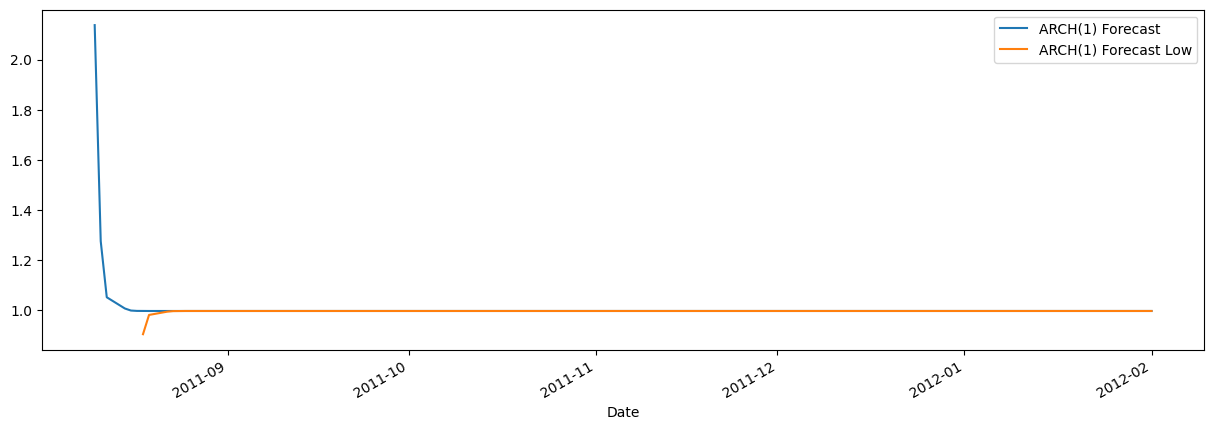

In [141]:
plot_cols = ['ARCH(1) Forecast', 'ARCH(1) Forecast Low']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [142]:
# theoretical unconditional variance
res_arch1.params

,params
mu,0.012671
omega,0.818829
alpha[1],0.177065


In [143]:
res_arch1.params['omega'] / (1 - res_arch1.params['alpha[1]']) # this is theoretical unconditional variance

np.float64(0.9950100548049201)

In [146]:
fcast_arch1.variance.loc['2011-08-17'].to_numpy()[-1] # convergence to unconditional variance if we start from low volatility

np.float64(0.9950100548049201)

In [147]:
fcast_arch1.variance.loc['2011-08-09'].to_numpy()[-1] # convergence to same unconditional variance if we start from high volatility

np.float64(0.9950100548049201)

In [ ]:
# GARCH(1, 1)

In [153]:
garch11 = arch_model(train['Scaled'], vol='GARCH', p=1, q=1)

In [154]:
res_garch11 = garch11.fit(update_freq=10)

Iteration:     10,   Func. Count:     62,   Neg. LLF: 2269.10795200303
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2269.10794182615
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [155]:
res_garch11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2269.11
Distribution:                  Normal   AIC:                           4546.22
Method:            Maximum Likelihood   BIC:                           4568.11
                                        No. Observations:                 1762
Date:                Thu, Nov 27 2025   Df Residuals:                     1761
Time:                        13:26:18   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0287  1.865e-02      1.538      0.124 [-7.863e-03,6.525e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0469  1.060e-02      4.427  9.560e-06 [2.615e-02,6.770e-02]
alpha[1]       0.1499  2.499e-02      6.000  1.972e-09     [  0.101,  0.199]
beta[1]        0.8021  2.545e-02     31.516 5.233e-218     [  0.752,  0.852]
============================================================================

Covariance estimator: robust
"""

/tmp/ipython-input-2192270333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['GARCH(1,1)'] = res_garch11.conditional_volatility


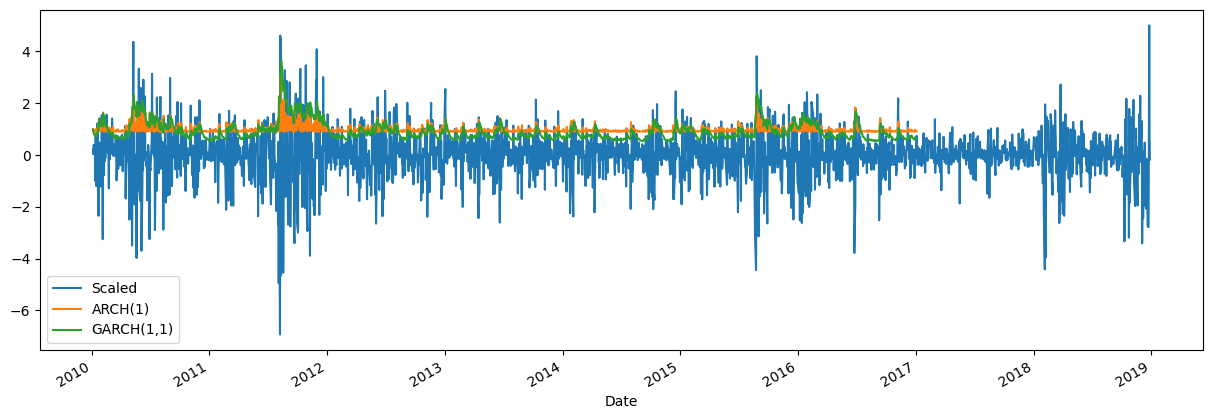

In [156]:
df2['GARCH(1,1)'] = res_garch11.conditional_volatility
df2[['Scaled', 'ARCH(1)', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [157]:
fcast_garch11 = res_garch11.forecast(
    horizon=Ntest, reindex=False, start='2011-08-09')

In [158]:
df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1) Forecast'] = np.sqrt(
    fcast_garch11.residual_variance.loc['2011-08-09'].to_numpy())

/tmp/ipython-input-1313440002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1) Forecast'] = np.sqrt(


/tmp/ipython-input-758368424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AbsScaled'] = df2['Scaled'].abs()


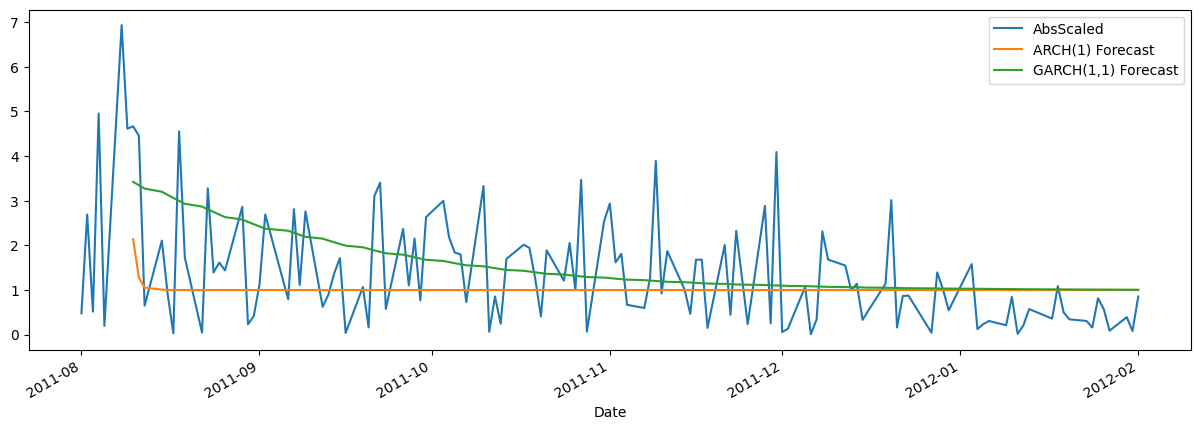

In [160]:
df2['AbsScaled'] = df2['Scaled'].abs()
# GARCH(1,1) Forecast starts at HIGHER PEAK than ARCH(1) Forecast
plot_cols = ['AbsScaled', 'ARCH(1) Forecast', 'GARCH(1,1) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [ ]:
# t-Distribution

In [161]:
garch11t = arch_model(train['Scaled'], vol='GARCH', p=1, q=1, dist='StudentsT')

In [162]:
res_garch11t = garch11t.fit(update_freq=10)

Iteration:     10,   Func. Count:     74,   Neg. LLF: 2230.1829780080916
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2230.179786588254
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


In [163]:
res_garch11t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2230.18
Distribution:      Standardized Student's t   AIC:                           4470.36
Method:                  Maximum Likelihood   BIC:                           4497.73
                                              No. Observations:                 1762
Date:                      Thu, Nov 27 2025   Df Residuals:                     1761
Time:                              13:32:15   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.691e-02      2.788  5.309e-03 [1.400e-02,8.028e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0399  9.295e-03      4.296  1.742e-05 [2.171e-02,5.815e-02]
alpha[1]       0.1615  2.507e-02      6.442  1.180e-10     [  0.112,  0.211]
beta[1]        0.8081  2.353e-02     34.350 1.428e-258     [  0.762,  0.854]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5803      0.733      7.610  2.737e-14 [  4.143,  7.017]
========================================================================

Covariance estimator: robust
"""

/tmp/ipython-input-1489074489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility


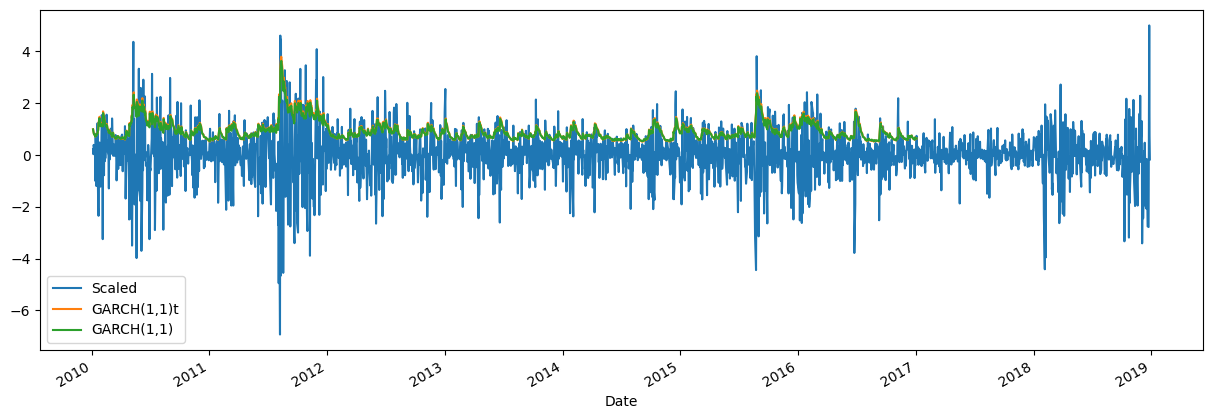

In [164]:
df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [165]:
fcast_garch11t = res_garch11t.forecast(
    horizon=Ntest, reindex=False, start='2011-08-09')

In [166]:
df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1)t Forecast'] = np.sqrt(
    fcast_garch11t.residual_variance.loc['2011-08-09'].to_numpy())

/tmp/ipython-input-2668051851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1)t Forecast'] = np.sqrt(


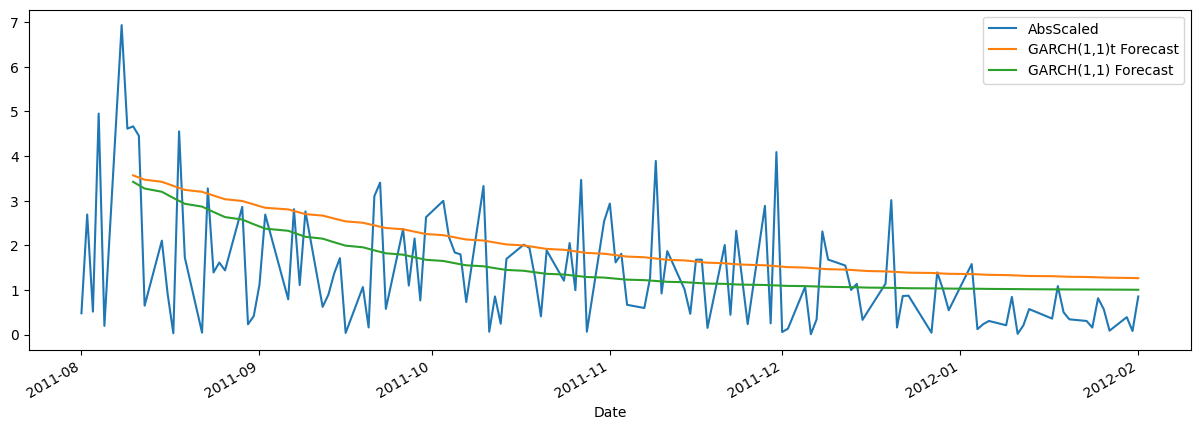

In [168]:
# with Student T distribution GARCH(1,1) Forecast attains slightly higer peak than GARCH(1,1) Forecast with Gaussian distribution
# This is not surprising because Student T distribution has fatter tail than Gaussian meaning it assigns a greater probability to
# extreme values. This makes the t-distribution more likely to produce outliers
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(1,1) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [ ]:
# GARCH(p, q)

In [169]:
garchpq = arch_model(train['Scaled'], p=8, q=5, dist='StudentsT')

In [170]:
res_garchpq = garchpq.fit(update_freq=10)

Iteration:     10,   Func. Count:    186,   Neg. LLF: 2613.358703934937
Iteration:     20,   Func. Count:    369,   Neg. LLF: 2224.515919918881
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2224.2181169605897
            Iterations: 29
            Function evaluations: 522
            Gradient evaluations: 29


In [171]:
res_garchpq.summary() # p-value very small only for omega,alpha[1],alpha[2]

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2224.22
Distribution:      Standardized Student's t   AIC:                           4480.44
Method:                  Maximum Likelihood   BIC:                           4568.02
                                              No. Observations:                 1762
Date:                      Thu, Nov 27 2025   Df Residuals:                     1761
Time:                              13:39:40   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0483  1.715e-02      2.817  4.846e-03 [1.470e-02,8.192e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1008  5.518e-02      1.826  6.783e-02 [-7.385e-03,  0.209]
alpha[1]       0.0744  3.351e-02      2.220  2.643e-02  [8.710e-03,  0.140]
alpha[2]       0.1687  6.306e-02      2.675  7.465e-03  [4.511e-02,  0.292]
alpha[3]       0.0000      0.108      0.000      1.000    [ -0.212,  0.212]
alpha[4]       0.0116  9.805e-02      0.118      0.906    [ -0.181,  0.204]
alpha[5]       0.0370  7.044e-02      0.526      0.599    [ -0.101,  0.175]
alpha[6]       0.0277  5.504e-02      0.503      0.615 [-8.019e-02,  0.136]
alpha[7]       0.0145  6.710e-02      0.216      0.829    [ -0.117,  0.146]
alpha[8]       0.0381  5.691e-02      0.670      0.503 [-7.339e-02,  0.150]
beta[1]        0.5490      0.499      1.101      0.271    [ -0.429,  1.526]
beta[2]        0.0000      0.622      0.000      1.000    [ -1.219,  1.219]
beta[3]        0.0000      0.549      0.000      1.000    [ -1.076,  1.076]
beta[4]        0.0000      0.354      0.000      1.000    [ -0.693,  0.693]
beta[5]        0.0000      0.346      0.000      1.000    [ -0.678,  0.678]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.7008      0.772      7.386  1.510e-13 [  4.188,  7.214]
========================================================================

Covariance estimator: robust
"""

In [173]:
# res_garch11t.aic < res_garchpq.aic, so, we prefer the more parsimonious simpler res_garch11t
res_arch1.aic, res_garch11.aic, res_garch11t.aic, res_garchpq.aic

(4921.9680576622495, 4546.2158836523, 4470.359573176508, 4480.436233921179)

/tmp/ipython-input-1396808164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['GARCH(p,q)'] = res_garchpq.conditional_volatility


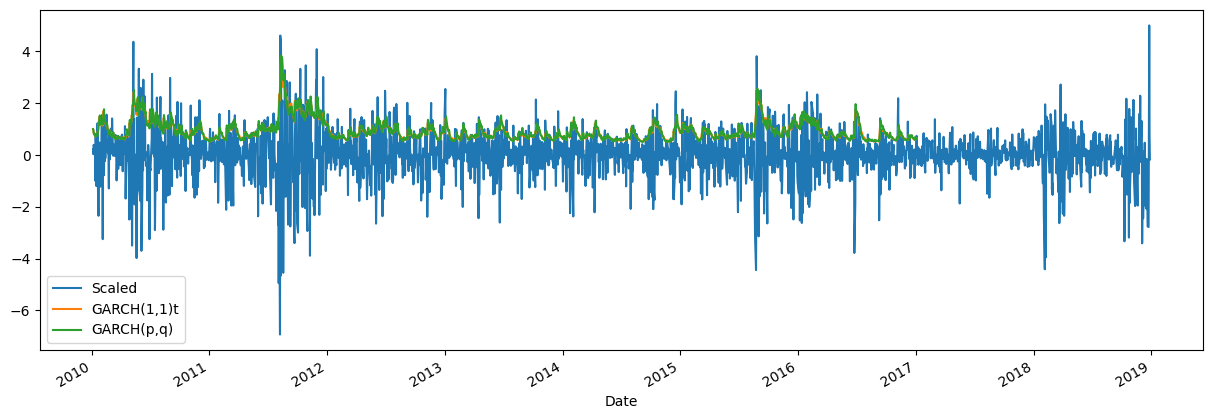

In [174]:
df2['GARCH(p,q)'] = res_garchpq.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(p,q)']].plot(figsize=(15, 5));

In [175]:
fcast_garchpq = res_garchpq.forecast(
    horizon=Ntest, reindex=False, start='2011-08-09')

In [176]:
df2.loc['2011-08-10':'2013-08-06', 'GARCH(p,q) Forecast'] = np.sqrt(
    fcast_garch11t.variance.loc['2011-08-09'].to_numpy())

/tmp/ipython-input-2465336405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['2011-08-10':'2013-08-06', 'GARCH(p,q) Forecast'] = np.sqrt(


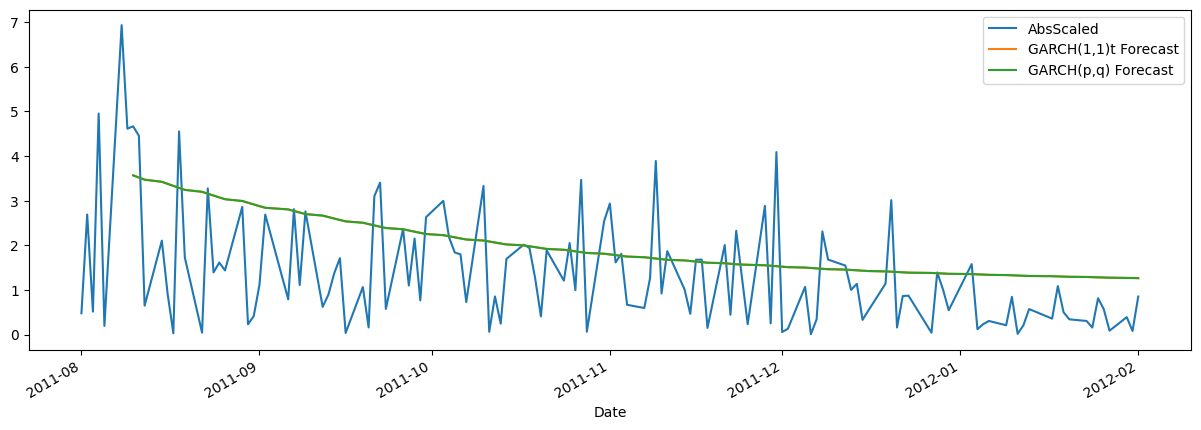

In [177]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(p,q) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [178]:
train_idx = df2.index <= train.index[-1]
test_idx = ~train_idx

In [179]:
# train is standard deviation whereas forecast is variance, so we take sqrt of variance
df2.loc[train_idx, 'GARCH(p,q) Train'] = res_garchpq.conditional_volatility
df2.loc[test_idx, 'GARCH(p,q) Test'] = np.sqrt(
    fcast_garchpq.variance.iloc[-1].to_numpy())

/tmp/ipython-input-302843873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[train_idx, 'GARCH(p,q) Train'] = res_garchpq.conditional_volatility
/tmp/ipython-input-302843873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[test_idx, 'GARCH(p,q) Test'] = np.sqrt(


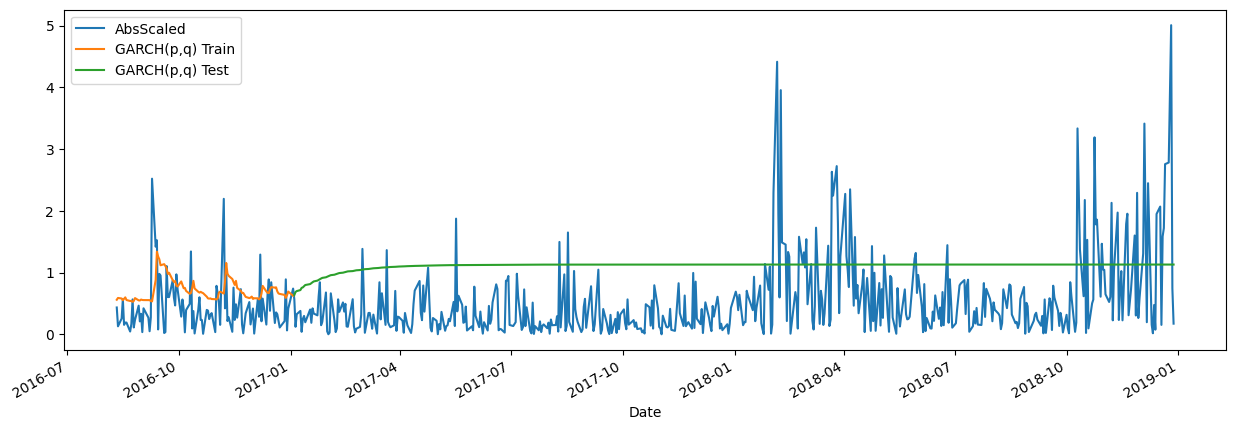

In [186]:
'''
Note: GARCH cannot predict long horizon volatility. It has some predictability only over shorter horizons (which goes hand in hand
with short horizon VOLATILITY CLUSTERING ).
'''
plot_cols = ['AbsScaled', 'GARCH(p,q) Train', 'GARCH(p,q) Test']
df2.iloc[-(Ntest+100):][plot_cols].plot(figsize=(15, 5));